In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import openfda as ofda
import reports as rp
import patients as pt
import drugs as dg
import reactions as react

from pandas.io.json import json_normalize
from pprint import pprint

from IPython.core.display import HTML
from IPython.display import display
pd.set_option('display.max_columns', 50)

In [3]:
results = ofda.load_from_file()
df, df_patients, df_v_drugs, df_v_reactions = ofda.parse_response(results)

file version <type 'list'>


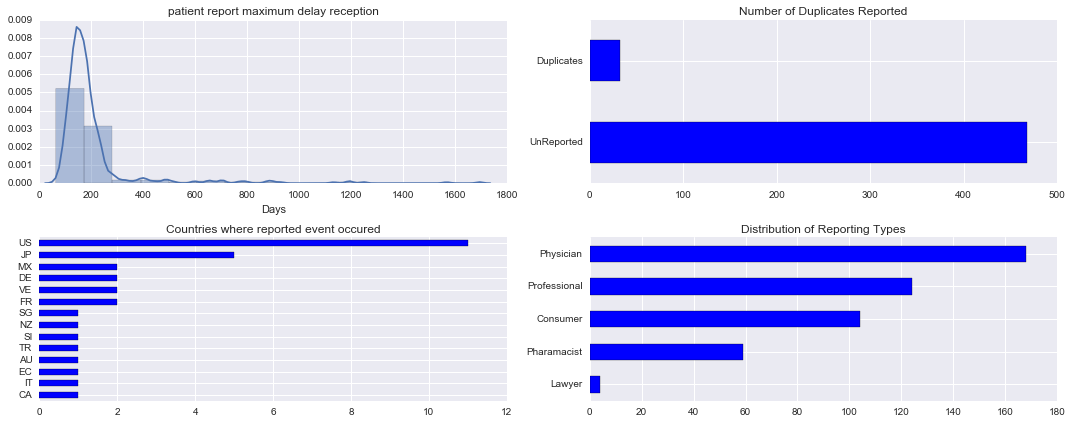

In [5]:
reports = rp.Reporter(df)
reports.in_format()
reports.prime_data()
reports.explore()
#reports.diagnostics()

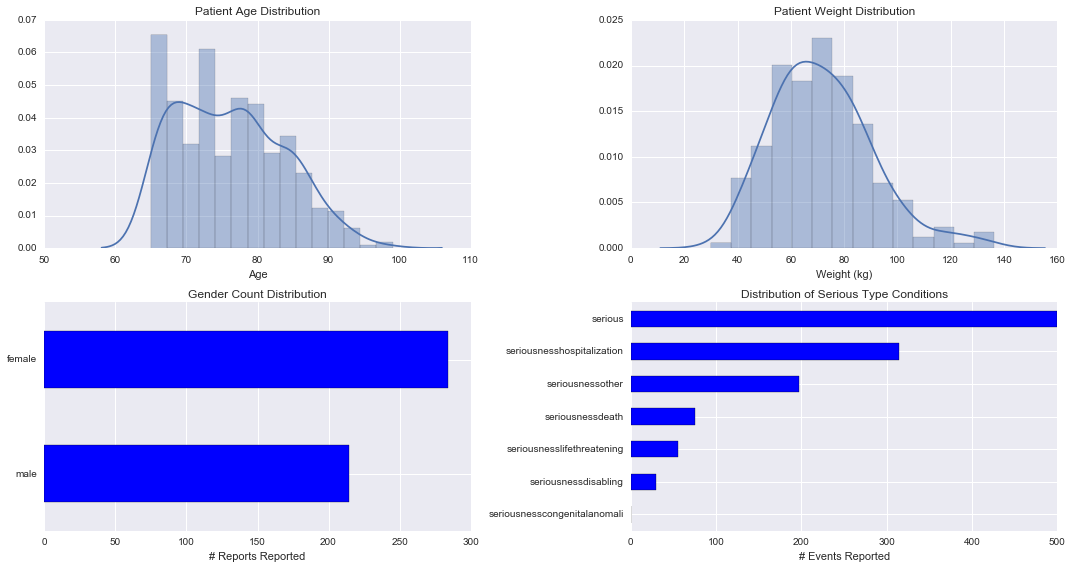

In [8]:
patients = pt.Patients(df_patients)
patients.in_format()
patients.prime_data()
patients.explore()
#patients.diagnostics()

In [9]:
patients.df.head()

,safetyreportid,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,patient.patientonsetage,patient.patientonsetageunit,patient.patientsex,patient.patientweight,patient.patientdeath.patientdeathdate,patient.patientonsetage.modified
0,8243643-X,1,NaN,NaN,NaN,NaN,NaN,1,80,801,1,NaN,NaN,80
1,8179845-0,1,NaN,NaN,NaN,1,NaN,NaN,78,801,1,59.09,NaN,78
2,8268986-5,1,NaN,1,NaN,NaN,NaN,NaN,85,801,1,NaN,NaN,85
3,8450343,1,NaN,NaN,1,1,NaN,NaN,80.18,801,1,87.00,NaN,80
4,8229179-0,1,NaN,NaN,NaN,NaN,NaN,1,74,801,2,58.00,NaN,74


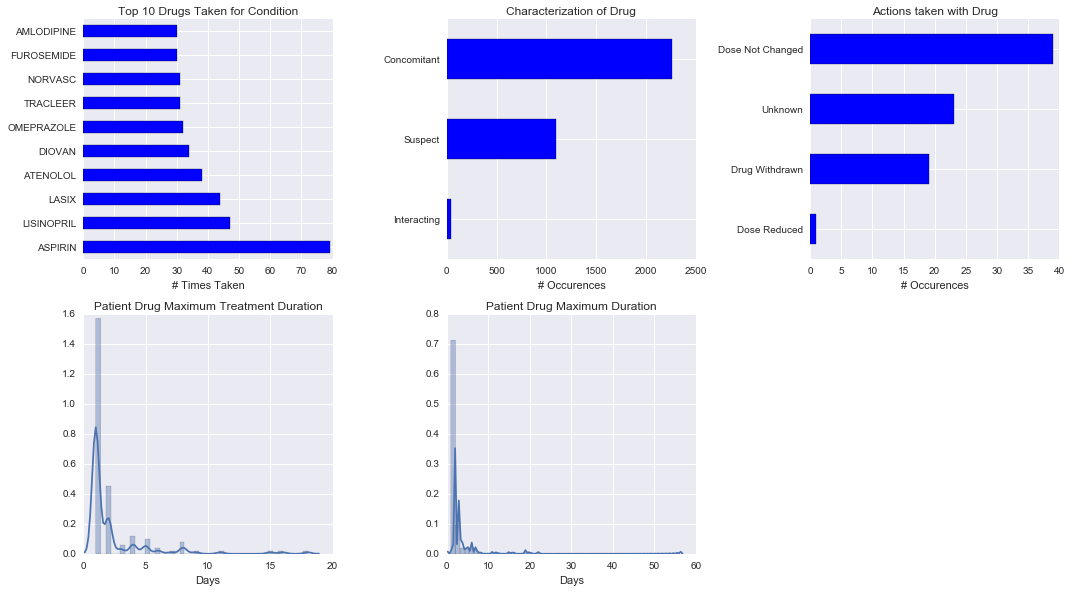

In [11]:
drugs = dg.Drugs()
drugs.transform_data(df_v_drugs)
drugs.in_format()
drugs.prime_data()
drugs.explore()
#drugs.diagnostics()

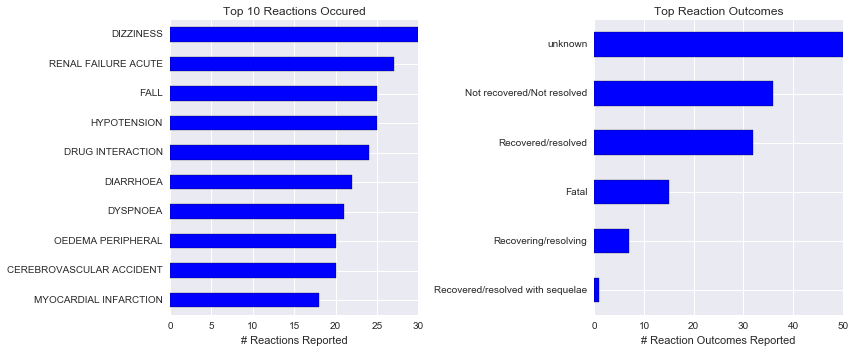

In [13]:
reactions = react.Reactions()
reactions.transform_data(df_v_reactions)
reactions.in_format()
reactions.explore()
#reactions.diagnostics()

In [14]:
display(reactions.df.head())
display(reactions.df_rm.head())

reactionmeddrapt  \
safetyreportid reactionnum                                     
8243643-X      0            WHITE BLOOD CELL COUNT DECREASED   
               1                    MYELODYSPLASTIC SYNDROME   
               2                       HAEMOGLOBIN DECREASED   
8179845-0      0                                    DYSPNOEA   
               1                       HAEMOGLOBIN DECREASED   

                           reactionmeddraversionpt reactionoutcome  
safetyreportid reactionnum                                          
8243643-X      0                               NaN             NaN  
               1                               NaN             NaN  
               2                               NaN             NaN  
8179845-0      0                               NaN             NaN  
               1                               NaN             NaN

,ABASIA,ABDOMINAL DISCOMFORT,ABDOMINAL HERNIA,ABDOMINAL PAIN,ABDOMINAL PAIN UPPER,ABDOMINAL STRANGULATED HERNIA,ABNORMAL BEHAVIOUR,ABSCESS JAW,ACCIDENT,ACCIDENTAL OVERDOSE,ACNE,ACTIVATED PARTIAL THROMBOPLASTIN TIME PROLONGED,ACUTE CORONARY SYNDROME,ACUTE HEPATIC FAILURE,ACUTE LEFT VENTRICULAR FAILURE,ACUTE MYELOID LEUKAEMIA,ACUTE MYOCARDIAL INFARCTION,ACUTE PRERENAL FAILURE,ACUTE PULMONARY OEDEMA,ACUTE RESPIRATORY FAILURE,ADVERSE DRUG REACTION,AGITATION,AGRANULOCYTOSIS,ALANINE AMINOTRANSFERASE INCREASED,ALCOHOL USE,...,VASCULITIS,VENTRICULAR EXTRASYSTOLES,VENTRICULAR FIBRILLATION,VENTRICULAR HYPERTROPHY,VENTRICULAR TACHYCARDIA,VERTIGO,VIRAL INFECTION,VISION BLURRED,VISUAL ACUITY REDUCED,VISUAL DISTURBANCE,VISUAL FIELD DEFECT,VISUAL IMPAIRMENT,VITAMIN B12 DEFICIENCY,VOMITING,WATER INTOXICATION,WEIGHT DECREASED,WHEEZING,WHITE BLOOD CELL COUNT DECREASED,WHITE BLOOD CELL COUNT INCREASED,WOUND COMPLICATION,WOUND INFECTION,WRIST FRACTURE,WRONG TECHNIQUE IN DRUG USAGE PROCESS,Weight increased,Wrist fracture
safetyreportid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4269846-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4282211-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4298963-0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4331609-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4338537-6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# explore the relationship between [patients, records, and their reactions]
display(patients.df.head())
display(reports.df.head())

,safetyreportid,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,patient.patientonsetage,patient.patientonsetageunit,patient.patientsex,patient.patientweight,patient.patientdeath.patientdeathdate,patient.patientonsetage.modified
0,8243643-X,1,NaN,NaN,NaN,NaN,NaN,1,80,801,1,NaN,NaN,80
1,8179845-0,1,NaN,NaN,NaN,1,NaN,NaN,78,801,1,59.09,NaN,78
2,8268986-5,1,NaN,1,NaN,NaN,NaN,NaN,85,801,1,NaN,NaN,85
3,8450343,1,NaN,NaN,1,1,NaN,NaN,80.18,801,1,87.00,NaN,80
4,8229179-0,1,NaN,NaN,NaN,NaN,NaN,1,74,801,2,58.00,NaN,74


,safetyreportid,transmissiondate,receiptdate,receivedate,duplicate,reportduplicate.duplicatesource,reportduplicate.duplicatenumb,occurcountry,primarysourcecountry,primarysource.qualification,primarysource.reportercountry,companynumb,receipt.duration,receive.duration,report.duration
0,8243643-X,2012-06-08,2012-03-14,2012-03-29,NaN,NaN,NaN,NaN,NaN,3,UNITED KINGDOM,GB-WATSON-2012-02280,86,71,86
1,8179845-0,2012-06-08,2012-02-15,2012-02-29,NaN,NaN,NaN,NaN,NaN,1,UNITED STATES,UTC-015681,114,100,114
2,8268986-5,2012-08-25,2012-03-30,2012-04-09,NaN,NaN,NaN,NaN,NaN,1,ITALY,IT-BAYER-2012-021763,148,138,148
3,8450343,2014-04-14,2013-06-10,2012-03-09,1,CELGENE,AU-CELGENEUS-008-50794-12022904,AU,AU,3,AU,AU-CELGENEUS-008-50794-12022904,308,766,766
4,8229179-0,2012-06-08,2012-03-15,2012-03-22,NaN,NaN,NaN,NaN,NaN,5,BRAZIL,BR-PFIZER INC-2012069287,85,78,85
